In [2]:
import sys
sys.path.append("..")

import data_frame
import models
import importlib
import evaluator as ev

In [3]:
importlib.reload(data_frame)
filePath = "../../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [3]:
df.data.loc[~df.data["faint"],["MAG_GAAP_r"]].max()

MAG_GAAP_r    22.859985
dtype: float32

In [8]:
importlib.reload(models)
model = models.MLModelContext(strategy=models.ANNRegressor(df))
model.train()
model.test_predict()

/home/kdrabicki/anaconda3/envs/test_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-14 11:11:13.094355: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2025-07-14 11:11:13.094380: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-14 11:11:13.094384: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: borsuk
2025-07-14 11:11:13.09

Epoch 49: early stopping
939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step


/home/kdrabicki/projekt/notebooks/../models.py:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.5368421 1.612541  1.9942145 ... 1.8323729 3.0517993 2.083822 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred"] = self.network.predict(self.X_test)


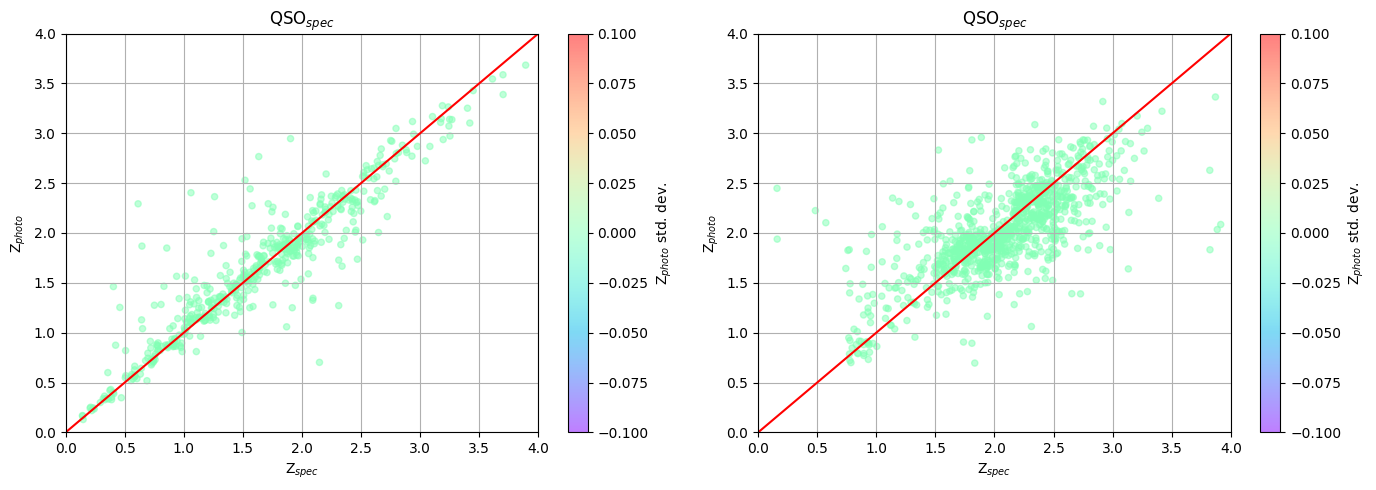

,MSE,R^2,Redshift error
test,0.101518,0.81886,"(0.013604288897377349, 0.13546963128593972)"
faint,0.226018,0.337897,"(0.002210309003146276, 0.17286099726187526)"


In [9]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()

In [10]:
# evaluator.test_data[evaluator.test_data["MAG_GAAP_r"] > 25]